In [296]:
from ucimlrepo import fetch_ucirepo
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, classification_report
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt

In [297]:
# fetch dataset 
soybean_large = fetch_ucirepo(id=90)

In [298]:
features = soybean_large.variables.name
all_features = pd.DataFrame(features, columns=['name'])
description = pd.DataFrame(soybean_large.variables.description, columns=['description'])

show_features = pd.concat([all_features, description], axis=1)
show_features

,name,description
0,class,"diaporthe-stem-canker, charcoal-rot, rhizocton..."
1,date,"april,may,june,july,august,september,october,?"
2,plant-stand,"normal,lt-normal,?"
3,precip,"lt-norm,norm,gt-norm,?"
4,temp,"lt-norm,norm,gt-norm,?"
5,hail,"yes,no,?"
6,crop-hist,"diff-lst-year,same-lst-yr,same-lst-two-yrs,sam..."
7,area-damaged,"scattered,low-areas,upper-areas,whole-field,?"
8,severity,"minor,pot-severe,severe,?"
9,seed-tmt,"none,fungicide,other,?"


In [299]:
data = soybean_large.data.original
data

,class,date,plant-stand,precip,temp,hail,crop-hist,area-damaged,severity,seed-tmt,...,int-discolor,sclerotia,fruit-pods,fruit-spots,seed,mold-growth,seed-discolor,seed-size,shriveling,roots
0,diaporthe-stem-canker,6.0,0.0,2.0,1.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
1,diaporthe-stem-canker,4.0,0.0,2.0,1.0,0.0,2.0,0.0,2.0,1.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
2,diaporthe-stem-canker,3.0,0.0,2.0,1.0,0.0,1.0,0.0,2.0,1.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
3,diaporthe-stem-canker,3.0,0.0,2.0,1.0,0.0,1.0,0.0,2.0,0.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
4,diaporthe-stem-canker,6.0,0.0,2.0,1.0,0.0,2.0,0.0,1.0,0.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302,2-4-d-injury,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
303,herbicide-injury,1.0,1.0,NaN,0.0,NaN,1.0,0.0,NaN,NaN,...,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
304,herbicide-injury,0.0,1.0,NaN,0.0,NaN,0.0,3.0,NaN,NaN,...,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
305,herbicide-injury,1.0,1.0,NaN,0.0,NaN,0.0,0.0,NaN,NaN,...,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [300]:
# 1. Size
data.shape

(307, 36)

In [301]:
# 2. Check data NaN
print(data.isnull().sum())

class               0
date                1
plant-stand         8
precip             11
temp                7
hail               41
crop-hist           1
area-damaged        1
severity           41
seed-tmt           41
germination        36
plant-growth        1
leaves              0
leafspots-halo     25
leafspots-marg     25
leafspot-size      25
leaf-shread        26
leaf-malf          25
leaf-mild          30
stem                1
lodging            41
stem-cankers       11
canker-lesion      11
fruiting-bodies    35
external-decay     11
mycelium           11
int-discolor       11
sclerotia          11
fruit-pods         25
fruit-spots        35
seed               29
mold-growth        29
seed-discolor      35
seed-size          29
shriveling         35
roots               7
dtype: int64


In [302]:
# 3. label encode
label_encoder = LabelEncoder()
data['class'] = label_encoder.fit_transform(data['class'])

In [303]:
# 4. fix NaN
imputer = KNNImputer(n_neighbors=5)
new_data = imputer.fit_transform(data)

data

,class,date,plant-stand,precip,temp,hail,crop-hist,area-damaged,severity,seed-tmt,...,int-discolor,sclerotia,fruit-pods,fruit-spots,seed,mold-growth,seed-discolor,seed-size,shriveling,roots
0,10,6.0,0.0,2.0,1.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
1,10,4.0,0.0,2.0,1.0,0.0,2.0,0.0,2.0,1.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10,3.0,0.0,2.0,1.0,0.0,1.0,0.0,2.0,1.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
3,10,3.0,0.0,2.0,1.0,0.0,1.0,0.0,2.0,0.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
4,10,6.0,0.0,2.0,1.0,0.0,2.0,0.0,1.0,0.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
303,13,1.0,1.0,NaN,0.0,NaN,1.0,0.0,NaN,NaN,...,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
304,13,0.0,1.0,NaN,0.0,NaN,0.0,3.0,NaN,NaN,...,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
305,13,1.0,1.0,NaN,0.0,NaN,0.0,0.0,NaN,NaN,...,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [304]:
data.dropna(inplace=True)
print(data.shape, '\n', data.isnull().sum())

(266, 36) 
 class              0
date               0
plant-stand        0
precip             0
temp               0
hail               0
crop-hist          0
area-damaged       0
severity           0
seed-tmt           0
germination        0
plant-growth       0
leaves             0
leafspots-halo     0
leafspots-marg     0
leafspot-size      0
leaf-shread        0
leaf-malf          0
leaf-mild          0
stem               0
lodging            0
stem-cankers       0
canker-lesion      0
fruiting-bodies    0
external-decay     0
mycelium           0
int-discolor       0
sclerotia          0
fruit-pods         0
fruit-spots        0
seed               0
mold-growth        0
seed-discolor      0
seed-size          0
shriveling         0
roots              0
dtype: int64


In [305]:
# 4. Data separation
X = data.drop('class', axis=1)
y = data['class']

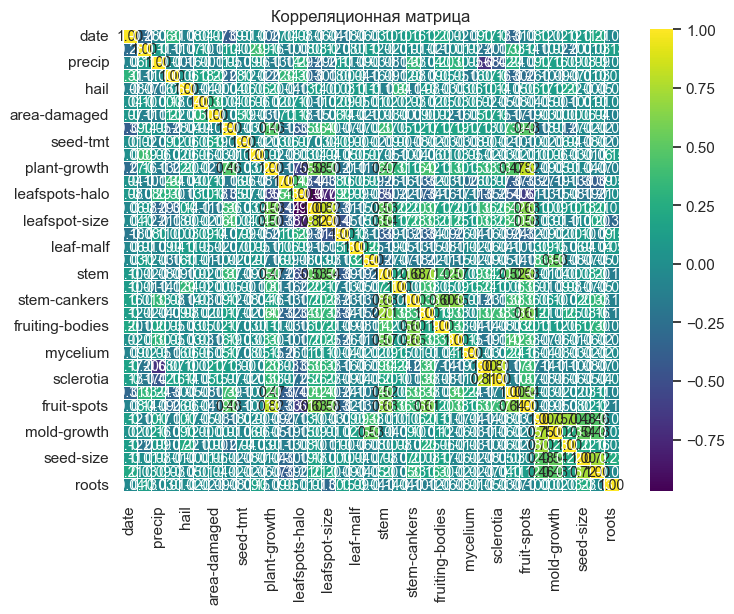

In [306]:
# 5. correlations
corr_matrix = X.corr()
sns.set(style='white')

# hotmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=.5, annot_kws={"size": 10})
plt.title('Корреляционная матрица')
plt.show()

In [307]:
# 6. train, test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22)

In [308]:
# 7. Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [309]:
# 7. data scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [310]:
# 8. PCA (< dimensions)
pca = PCA(n_components=22)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [311]:
X_train_pca[:5]

array([[ 3.53624996e+00,  4.07176823e-02, -2.07573499e+00,
         1.06555128e+00, -5.26276262e-01,  5.44085508e-01,
        -1.44973331e+00, -5.36235818e-01, -2.05938412e+00,
        -7.13146106e-01,  2.34327756e+00, -9.49339947e-01,
        -1.91817429e-01,  7.11357438e-01, -2.06807966e-01,
         3.75510606e-01, -2.25097893e-01, -5.91869875e-01,
         6.82864910e-01, -1.17432952e-01, -3.20744337e-01,
         2.39448545e-01],
       [-1.67137658e+00,  2.05596685e+00,  1.34174083e+00,
        -8.49414145e-01,  3.55024271e+00, -8.28031270e-04,
        -3.99524399e-01, -3.21563257e+00,  3.24281059e-01,
        -1.51639142e+00, -7.88373523e-01,  7.37189736e-01,
        -6.87255420e-01,  1.48916059e+00,  3.16295141e-01,
        -3.82640484e-01, -7.82366873e-01, -8.14510405e-01,
         5.47296594e-01,  5.87921630e-01, -4.01205068e-01,
        -1.87529646e-01],
       [-2.45891333e+00, -6.03065058e-01,  5.51062800e-01,
         6.09980982e-01,  1.71986736e-02, -5.92998648e-03,
    

In [312]:
# 7. models
# SVM
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_pca, y_train)

y_pred = svm_model.predict(X_test_pca)

# Оценка точности модели
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1-мера модели:", f1)

print("Отчет о классификации:")
print(classification_report(y_test, y_pred, zero_division='warn'))

F1-мера модели: 0.903664772727273
Отчет о классификации:
              precision    recall  f1-score   support

           1       0.77      0.91      0.83        11
           2       1.00      0.78      0.88         9
           3       1.00      0.50      0.67         2
           4       1.00      0.67      0.80         3
           5       1.00      1.00      1.00        12
           6       1.00      1.00      1.00         6
           7       1.00      1.00      1.00         3
          10       0.33      1.00      0.50         1
          11       1.00      1.00      1.00         3
          12       0.90      0.75      0.82        12
          14       0.67      1.00      0.80         4
          15       1.00      1.00      1.00         5
          16       1.00      1.00      1.00         4
          17       1.00      1.00      1.00         2
          18       1.00      1.00      1.00         3

    accuracy                           0.90        80
   macro avg       0.91

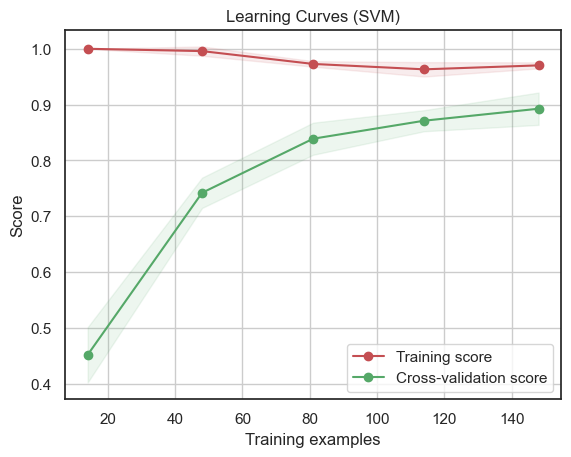

In [313]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Параметры для кривых обучения
title = "Learning Curves (SVM)"
cv = 5  # Количество разбиений для кросс-валидации
plot_learning_curve(svm_model, title, X_train_pca, y_train, cv=cv, n_jobs=-1)

plt.show()

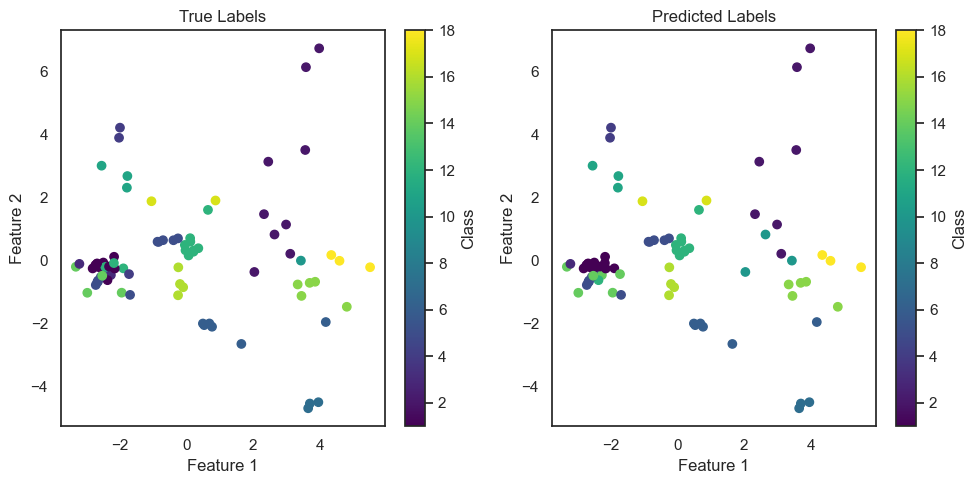

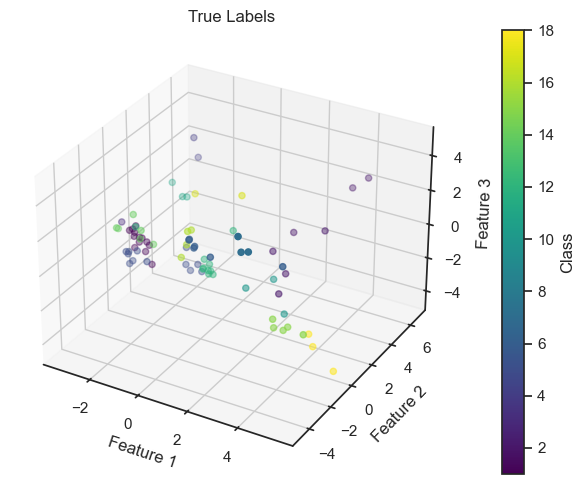

In [314]:
from mpl_toolkits.mplot3d import Axes3D

# Двумерная визуализация
plt.figure(figsize=(10, 5))

# Истинные метки
plt.subplot(1, 2, 1)
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap='viridis', label='True Labels')
plt.colorbar(label='Class')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('True Labels')

# Предсказанные метки
plt.subplot(1, 2, 2)
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_pred, cmap='viridis', label='Predicted Labels')
plt.colorbar(label='Class')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Predicted Labels')

plt.tight_layout()
plt.show()

# Трехмерная визуализация
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111, projection='3d')

# Истинные метки
scatter = ax.scatter(X_test_pca[:, 0], X_test_pca[:, 1], X_test_pca[:, 2], c=y_true, cmap='viridis', label='True Labels')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
plt.title('True Labels')

plt.colorbar(scatter, label='Class')

plt.tight_layout()
plt.show()

In [315]:
# logistic model
logistic_model = LogisticRegression(random_state=42)

logistic_model.fit(X_train_scaled, y_train)

y_pred_logistic = logistic_model.predict(X_test_scaled)

f1_logistic = f1_score(y_test, y_pred_logistic, average='weighted')
print("F1-мера модели логистической регрессии:", f1_logistic)

print("Отчет о классификации для модели логистической регрессии:")
print(classification_report(y_test, y_pred_logistic))

F1-мера модели логистической регрессии: 0.8865883838383837
Отчет о классификации для модели логистической регрессии:
              precision    recall  f1-score   support

           1       0.77      0.91      0.83        11
           2       1.00      0.67      0.80         9
           3       0.50      0.50      0.50         2
           4       1.00      0.67      0.80         3
           5       0.92      1.00      0.96        12
           6       1.00      1.00      1.00         6
           7       1.00      1.00      1.00         3
          10       0.50      1.00      0.67         1
          11       1.00      1.00      1.00         3
          12       0.90      0.75      0.82        12
          14       0.80      1.00      0.89         4
          15       1.00      1.00      1.00         5
          16       1.00      1.00      1.00         4
          17       0.67      1.00      0.80         2
          18       1.00      1.00      1.00         3

    accuracy     

In [316]:
# Decision Tree
dt_model = DecisionTreeClassifier(random_state=22)
dt_model.fit(X_train_pca, y_train)
y_pred_dt = dt_model.predict(X_test_pca)

f1_dt = f1_score(y_test, y_pred_dt, average='weighted')
print(f"F1-мера модели Decision Tree: {f1_dt}")
print("Отчет о классификации Decision Tree:")
print(classification_report(y_test, y_pred_dt))

F1-мера модели Decision Tree: 0.7340802464443769
Отчет о классификации Decision Tree:
              precision    recall  f1-score   support

           1       0.69      0.82      0.75        11
           2       1.00      0.56      0.71         9
           3       0.00      0.00      0.00         2
           4       1.00      0.33      0.50         3
           5       0.79      0.92      0.85        12
           6       0.80      0.67      0.73         6
           7       1.00      1.00      1.00         3
          10       0.50      1.00      0.67         1
          11       1.00      1.00      1.00         3
          12       0.73      0.67      0.70        12
          14       0.33      0.50      0.40         4
          15       1.00      0.80      0.89         5
          16       1.00      1.00      1.00         4
          17       0.20      0.50      0.29         2
          18       1.00      0.67      0.80         3

    accuracy                           0.72     

In [317]:
rf_model = RandomForestClassifier(random_state=22, max_depth=9, min_samples_leaf=2)
rf_model.fit(X_train_pca, y_train)
y_pred_rf = rf_model.predict(X_test_pca)

f1_rf = f1_score(y_test, y_pred_rf, average='weighted')
print(f"F1-мера модели Random Forest: {f1_rf}")
print("Отчет о классификации Random Forest:")
print(classification_report(y_test, y_pred_rf))

F1-мера модели Random Forest: 0.8839958795112247
Отчет о классификации Random Forest:
              precision    recall  f1-score   support

           1       0.79      1.00      0.88        11
           2       1.00      0.89      0.94         9
           3       0.00      0.00      0.00         2
           4       1.00      0.67      0.80         3
           5       1.00      1.00      1.00        12
           6       1.00      1.00      1.00         6
           7       1.00      1.00      1.00         3
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         3
          12       0.82      0.75      0.78        12
          14       0.40      0.50      0.44         4
          15       1.00      1.00      1.00         5
          16       1.00      1.00      1.00         4
          17       1.00      1.00      1.00         2
          18       1.00      1.00      1.00         3

    accuracy                           0.89     

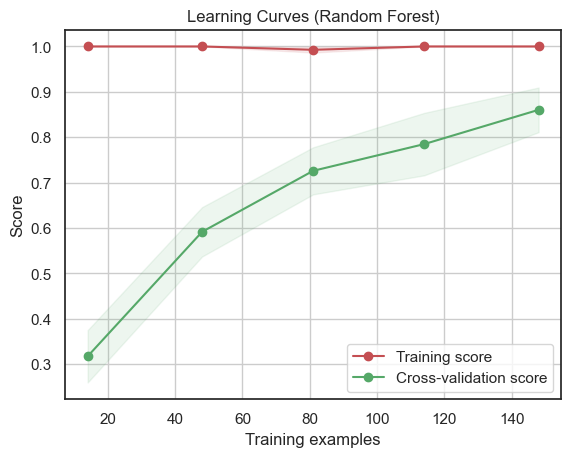

In [318]:
# Visual Forest
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Параметры для кривых обучения
title = "Learning Curves (Random Forest)"
cv = 5  # Количество разбиений для кросс-валидации
plot_learning_curve(rf_model, title, X_train_pca, y_train, cv=cv, n_jobs=-1)

plt.show()

Conclusion:

Best Model: SVM
F1-мера модели: 0.903664772727273

Опорные Векторные Машины (SVM) — это алгоритм машинного обучения с учителем, который часто используется для задач классификации и регрессии. 

Цель: SVM стремится найти оптимальную гиперплоскость, которая наилучшим образом разделяет точки данных различных классов в пространстве признаков. В двумерном пространстве эта гиперплоскость является линией, а в пространстве более высокой размерности — это плоская аффинная подпространство.

F1-мера: Модель SVM достигла F1-меры 0.9037, что является высоким показателем, указывающим на хорошую производительность модели в мультиклассовой классификации. F1-мера учитывает как точность, так и полноту, поэтому она является хорошим индикатором сбалансированности модели.

Precision (Точность): Точность для большинства классов высока, несколько классов достигли точности 1.00, что означает, что все их предсказания были правильными. Исключением является класс 10 с точностью 0.33, что может указывать на недостаток данных для этого класса или сложность в его классификации.

Recall (Полнота): Полнота также высока для большинства классов, что указывает на то, что модель правильно идентифицирует большую часть объектов каждого класса. Однако для некоторых классов, таких как класс 3 и класс 4, полнота ниже, что может требовать дополнительной работы по улучшению распознавания этих классов.

F1-Score (F1-оценка): F1-оценка, являющаяся гармоническим средним между точностью и полнотой, также высока для большинства классов, что подтверждает сбалансированность модели. Некоторые классы имеют идеальные значения F1 (1.00), что указывает на идеальную производительность по этим классам.

Классы 5, 6, 7, 11, 15, 16, 17 и 18 показывают идеальные результаты по всем метрикам (точность, полнота, F1-оценка), что говорит о высокой уверенности модели в предсказаниях для этих классов.

Класс 10 имеет наименьшую точность и сбалансированность, что может свидетельствовать о недостатке обучающих данных для этого класса или о схожести его признаков с другими классами.

Вывод:
Модель SVM показала хорошие результаты для мультиклассовой классификации, достигнув высокого показателя F1-меры и точности. Однако некоторые классы требуют дополнительного внимания для улучшения их классификации.